---
# PHY426 Practical 8 - Monte Carlo Methods
---

**PHY2710 - complete this by the end of the practical as a group.**



## Random Numbers 

Why do we need them?
 
* Monte Carlo integration
* Monte Carlo simulations 
* Stochastic algorithms 
* Cryptography (Not in this course, but interesting nonetheless. Section 10.1.3 in Newman's book gives an intro.)

What is a useful random sequence of numbers?
* Follows some desired distribution
* Unpredictable on a number-by-number basis
* Fast to generate (we may need billions of them)
* Long period (we may need billions of them and we need to avoid repetition)
* Uncorrelated

Problems with actually random numbers:
* hard/impossible to reproduce for debugging
* it may sometimes be hard to characterize underlying distribution


## How Can a Computer Generate Random Numbers?

![image.](xkcd211.png)


... well, it can't. The computer can't do things randomly.

There are a couple of options open to us:
* identify a physical process that is random and have the computer store information about that process to provide a random number
* Use an algorithm for generating a sequence of numbers that approximates the properties of random numbers. This is called a "Pseudorandom Number Generator" (PRNG).


## How Can We Check the Quality of a Pseudorandom Number Generator?
### Look for Correlations

Simple pairwise correlations:
$$\epsilon(N, n) = \frac1N \sum_{i=1}^{N}x_i x_{i+n} - \mathrm E[x^2]$$
* $N =$ number of data points
* $n = $ correlation "distance"
* $\mathrm E[x] = \sum_{i=1}^N x_i/N$, the expected value.



### One criterion for a "good" PNRG: 
We want to avoid correlations between pairs of numbers.

If the tuplets of numbers $(x_i ,x_{i+n})$ are not correlated, ε(N,n) should converge to zero (with a statistical error)
as N → ∞.

### "Bad" and "Good" PRNG's -- Some Examples

![image.](Mersenne_small.png)

The images on the right show points obtained using the Mersenne twister. You can read about these methods here

"Random Numbers in Scientific Computing: An Introduction"
https://arxiv.org/pdf/1005.4117.pdf



## Linear Congruential Generator

* The sequence of numbers produced by a PRNG seems random. However, the numbers are reproducible if you start with the same initial "seed" value.
* Here is an example of a simple PNRG: the "Linear Congruential Random Number Generator". 
$$x_{i+1} = (ax_i + c)\mod m$$
    E.g. in Python:
    `x[i+1] = (a*x[i] + c) % m`
* $x_0$ is the seed,
* $m$ is a large integer, which determines the period
* Recall: `%` in Python is the modulo operator. It returns the remainder of dividing the left hand operand by right hand operand. It gives the remainder in integer division.

* How does the computer pick seed $x_0$?  Taking the system time is quite common. This is shown in the modified code below. Notice that the random numbers differ each time you run this code.

* There are a couple of things to notice about this random number generator. First, it is not actually random. It's completely deterministic. If you use the same value for the seed, $x_0$, you'll always get the same list of "random numbers". 
* The numbers are always positive. Since they are calculated `% m`, they can never be > m. Thus, m must be chosen appropriately.
* There are some choices of `c` and `m` that result in lists of numbers that may appear to be random, but looking closely you will find that they are not random and would be a poor choice (see example with both c and m even below).

In [ ]:
# Newman's lcg.py
from pylab import plot, show

N = 100
a = 1664525
c = 1013904223
m = 4294967296
x = 1
results = []

for i in range(N):
    x = (a*x+c) % m
    results.append(x)
plot(results, "o")
show()

In [ ]:
# Newman's lcg.py - using time to generate an initial seed x0
from pylab import plot, show
import time

N = 100
a = 1664525
c = 1013904223
m = 4294967296

# Use the system time as the seed
x = int(time.time())
print("The random seed used is: ", x)
results = []

for i in range(N):
    x = (a*x+c) % m
    results.append(x)
plot(results, "o")
show()

## Exercise 1: Drawbacks of Pseudo-random number generators

(a) Comment the code for the Linear Congruentrial PNRG. 

In [1]:
# (a)
# Newman's lcg.py -- with your comments
from pylab import plot, show

# The number of points we want to generate
N = 100

# We will generate our randum numbers x by:
# x[i+1] = (a*x+c) % m

# We define our constants for a,c, and m
a = 1664525
c = 1013904223
m = 4294967296

# We start by feeding our expression for 
# x[i+1] with x=1
x = 1

# we will store our results in the following list
results = []

# For each loop we calculate the value of x and store it
# in results for a total of N loops
for i in range(N):
    x = (a*x+c) % m
    results.append(x)
    
# We plot our list of points as dots on a plane organized
# by the position i in the list on the x-axis and its value 
# x[i] on the y-axis
plot(results, "o")
show()

<Figure size 640x480 with 1 Axes>

(b) Test using different values of a, c, m. What happens when c and m are both even? 

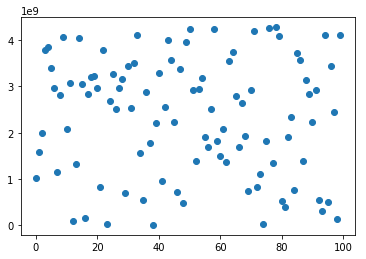

[1015568746, 1584250759, 1990586536, 3780522469, 3848742646, 3398630383, 2968411372, 1155656341, 2819068162, 4060924759, 2079915964, 3079015129, 101305186, 1317779659, 4045038460, 3051689833, 166603066, 2829195307, 3200334784, 3222876097, 2967634510, 834590683, 3784829272, 34628581, 2691634606, 3270773863, 2518744264, 2962689481, 3162493222, 692225227, 3449549680, 2526709969, 3513774202, 4113294139, 1566002032, 536965885, 2870234062, 1779221899, 8876932, 2201657041, 3293404702, 957912607, 2543621524, 4004228809, 3570049330, 2234089819, 724344712, 3382468489, 471950818, 3956692411, 4229588896, 2920547017, 1383416566, 2939688739, 3190856560, 1896936013, 1686621742, 2518721803, 4230499084, 1827773641, 1492663210, 2089616851, 1370930884, 3556583677, 3752326942, 2796762655, 1684157632, 2639787913, 1931906194, 735442291, 2925830572, 4194756217, 819009250, 1112574043, 30896944, 1811261413, 4267020310, 1354430323, 4276117492, 4081594573, 519088102, 386884963, 1901113900, 2331934669, 763578322,

In [17]:
#(b)

from pylab import plot, show

N = 100
a = 1664525
c = 1013904221
m = 4294967292
x = 1
results = []

for i in range(N):
    x = (a*x+c) % m
    results.append(x)
plot(results, "o")
show()

print(results)


Write your answer here in this Markdown cell -- what happens when both m & c are even? From this example, you can see why the Linear Congruentrial PNRG is not widely used. It can be difficult to find patterns in lists of pseudorandom numbers.

With an even c and m, the plot exhibits more frequent reccurences of values. For even c and m, all generated results were odd. For some combinations of c and m, all the generated results were even.


## Benefits of PNRGs: 
    
* faster than real random number generators
* good for testing code since you can supply the same "seed" for reproducible outcome using the `seed()` function:

    `seed(4219)`

    `x = random()`

    will always produce the same `x`.

* easy to generate many different sequences -- just pick many different seeds.

Functions that you are most likely to use:

* `random()`: gives a random float uniformly distributed in a the range $[0, 1)$ (all values have equal probability of being selected),
* `randrange(m, n)`: Gives a random integer from `m` to `n-1`, inclusive.

* If you need a uniformly distributed random float outside the range $[0,1)$, say in range $[a,b)$, then just multiply your answer by $(b-a)$ and shift the argument. For example:

    `num = random()`

    `shiftnum = (b-a)*(num+a)`
    
Useful additional resources:

https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html  
https://docs.python.org/3/library/random.html

## Example 1: Using random numbers to simulate radioactive decay

The radioisotope thallium 208 decays to stable lead 208 with a half-life of 3.053 minutes. Suppose we start with a sample of 1000 thallium atoms. Let us simulate the decay of these atoms over time, mimicking the randomness of that decay using random numbers.

On average we know that the number *N* of atoms in our sample will fall off exponentially over time according to the standard equation of radioactive decay:

$N(t) = N(0)2^{-t/\tau}$,

where $\tau$ is the half-life. Then the fraction of atoms remaining after time *t* is:

$N(t)/N(0) = 2^{-t/\tau}$

and the fraction that have decayed, which is also equal to the probability *p(t)* that any particular single atom has decayed, is one minus this number:

$p(t) = 1 - 2^{-t/\tau}$.

Thus, this number represents the probability that a single atom decays in a time interval of length *t*.

We will simulate the decay of our sample of 1000 atoms by dividing the atoms into two sets, one of thallium and one of lead. Initially, all the atoms are in the thallium set. We will divide time into time steps of 1 second each and in each time step we will consider in turn each thallium atom and with the probability given by the equation for *p(t)* above decide whether or not it decays. In this way, we work out the total number of thallium atoms that decay in each second, then we subtract this number from the total in the thallium set and add it to the total in the lead set.



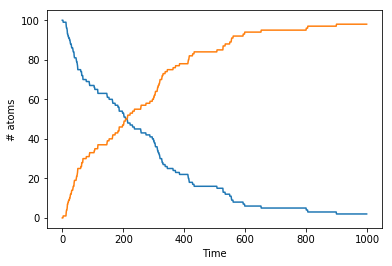

In [11]:
# Your code here

from random import random 
from numpy import arange
from pylab import plot, xlabel, ylabel, show

# Set the constants
# Number of thallium and lead atoms
NTl = 100
NPb = 0
# Half life of thallium in seconds
tau = 3.053*60
# Size of time step in seconds
h = 1.0
# Probability of decay in one step
p = 1 -2**(-h/tau)
# Max time
tmax = 1000

# Plot time points
tpoints = arange(0.0, tmax, h)
Tlpoints = []
Pbpoints= []

# Main loop simulating the decay
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)
    
    # Compute the number of atoms that decay in this time step
    decay = 0
    for i in range(NTl):
        if random()<p:
            decay += 1
    NTl -= decay
    NPb += decay
    
# Plot the result
plot(tpoints, Tlpoints)
plot(tpoints, Pbpoints)
xlabel("Time")
ylabel("# atoms")
show()

# Exercise 1: Radioactive decay chain

This exercise looks at a more advanced version of the simple radioactive decay simulation the example above.

The isotope $^{213}$Bi decays to stable $^{209}$Bi via one of two different
routes, with probabilities and half-lives thus:

![image.](decaychain.png)

(Technically, $^{209}$Bi isn't really stable, but it has a half-life of
more than $10^{19}$ years, a billion times the age of the universe, so it
might as well be.)

Starting with a sample consisting of 10,000 atoms of $^{213}$Bi,
simulate the decay of the atoms as in the example above by dividing time into
slices of length $\delta t=1\,$s each and on each step doing the following:

* For each atom of $^{209}$Pb in turn, decide at random, with the
  appropriate probability, whether it decays or not.  (The probability can
  be calculated from $p(t) = 1 - 2^{-t/\tau}$.)  Count the total number that decay,
  subtract it from the number of $^{209}$Pb atoms, and add it to the number
  of $^{209}$Bi atoms.
* Now do the same for $^{209}$Tl, except that decaying atoms are
  subtracted from the total for $^{209}$Tl and added to the total for
  $^{209}$Pb.
* For $^{213}$Bi the situation is more complicated: when a $^{213}$Bi
  atom decays you have to decide at random with the appropriate probability
  the route by which it decays.  Count the numbers that decay by each route
  and add and subtract accordingly.

Note that you have to work up the chain from the bottom like this, not down
from the top, to avoid inadvertently making the same atom decay twice on a
single step.

Keep track of the number of atoms of each of the four isotopes at all times
for 20,000 seconds and make a single graph showing the four numbers as a
function of time on the same axes.

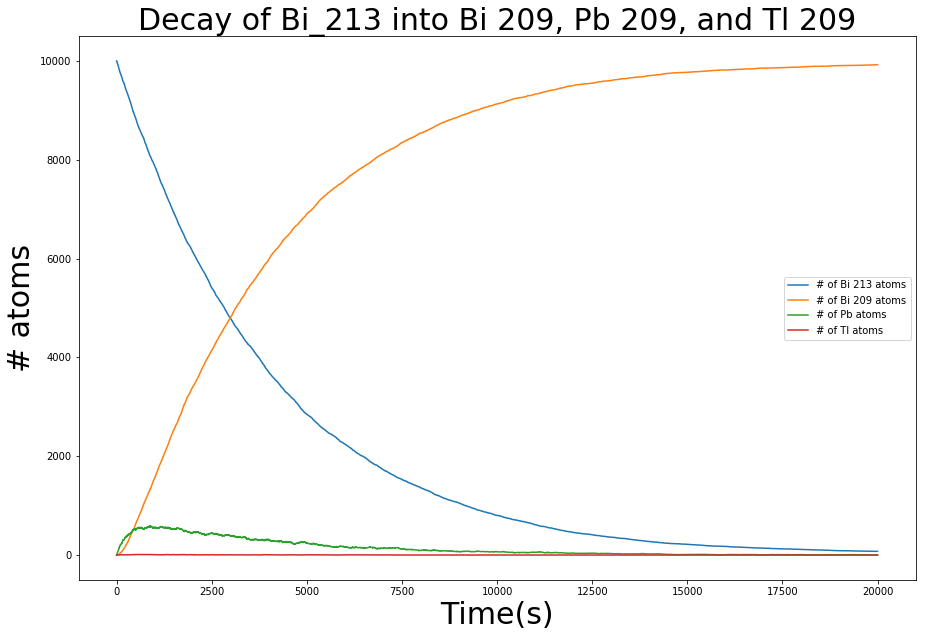

In [17]:
# Write your program here

from random import random 
import numpy as np
import matplotlib.pyplot as plt


# Number of Pb_209, Bi_209, Tl_209, and Bi_213 atoms
NBi_213 = 10000
NBi_209 = 0
NPb = 0
NTl = 0


# Probablities of Bi_213 decaying to Pb_209
p_1 = 0.9791


# Half-lifes for 213_Bi, 209_Tl, 209_Pb
tau_Bi_213 = 46*60
tau_Pb = 3.3*60
tau_Tl = 2.2*60

# Define the time step h = 1s
h = 1.0

# Probability of Decay for Bi_213, Pb_209, Tl_209
p_Bi_213 = 1 -2**(-h/tau_Bi_213)
p_Pb = 1 -2**(-h/tau_Pb)
p_Tl = 1 -2**(-h/tau_Tl)

# Size of time step in seconds
h = 1.0

# Max time
tmax = 20000

# Plot time points
tpoints = np.arange(0.0, tmax, h)

# Where we will store the number of each type of atom for each time step, h
Bi_213_points = []
Bi_209_points = []
Pb_points = []
Tl_points = []


# Main loop simulating the decay
for t in tpoints:
    
    # Appending current number of atoms of each type
    Bi_213_points.append(NBi_213)
    Bi_209_points.append(NBi_209)
    Pb_points.append(NPb)
    Tl_points.append(NTl)
    
    # Store the number Pb atoms that decay
    Pb_decay = 0
    for i in range(NPb):
        
        # Each Pb atom has a probability p_Pb of decaying, which we add to 
        # our variable Pb_decay which keeps track of each Pb decay for each
        # time step
        if random()<p_Pb:
            Pb_decay += 1
    
    # Compute the number of atoms of Tl that decay into Pb
    Tl_decay = 0
    for i in range(NTl):
        if random()<p_Tl:
            Tl_decay += 1
            
    # Calculating the number of Bi_213 that decay into either Tl
    # or Pb. 
    Bi_213_decay = 0
    for i in range(NBi_213):
           
        # Each Bi_213 has a probability p_Bi_213 of decaying
        if random()<p_Bi_213:
            
            # We update our count of the total Bi_213_decay 
            Bi_213_decay += 1
            
            # Each decay has a p_1 chance of decaying into Pb 
            # and a 1 - p_1 chance of decaying into Tl. In either
            # case we add back to the respective totals of these atoms
            if random()<p_1:
                NPb += 1
            else:
                NTl += 1
        
    NTl = NTl - Tl_decay
    NPb = NPb - Pb_decay + Tl_decay
    NBi_209 = NBi_209 + Pb_decay
    NBi_213 -= Bi_213_decay

    
# Define the figure and axes objects with size 15x10
fig, ax = plt.subplots(figsize=(15.0,10.0))
plt.title("Decay of Bi_213 into Bi 209, Pb 209, and Tl 209", fontsize=30)

# Plot the result
plt.plot(tpoints, Bi_213_points, label='# of Bi 213 atoms')
plt.plot(tpoints, Bi_209_points, label='# of Bi 209 atoms')
plt.plot(tpoints, Pb_points, label='# of Pb atoms')
plt.plot(tpoints, Tl_points, label='# of Tl atoms')

plt.legend()
plt.xlabel("Time(s)", fontsize=30)
plt.ylabel("# atoms", fontsize=30)
plt.show()


## Random numbers from non-uniform distributions

* If you have a source of uniform random numbers you can turn them into a set of nonuniform ones using a variety of methods -- the transformation method is the most common and is outlined below.
* Get a uniformly distributed random number, then use a transformation to make it seem like it comes from a non-uniform distribution.

* Consider source of random floats $z$ from a distribution with probability density $q(z)$, i.e., the probability of generating a number in the interval $z$ to $z+\text dz$ is:
$$q(z)\text dz$$
* For a uniform distribution, $q(z)=1$ since for all d*z*, equal probability of number being chosen.

* Now consider a transformation of *z* into new variable, say *x* using:
    $$x=x(z)$$
* Then *x* is also a random number, but will have some other probability distribution, call it $p(x)$.
* The probability of generating a value of *x* between *x* and *x + dx* is by definition equal to the probability of generating a value of $z$ between the corresponding $z$ and $z + \text dz$:
    $$p(x) \text dx = q(z) \text dz, \quad \text{where}\ x=x(z)$$



* Goal: find a function *x(z)* so that x has the distribution *p(x) that we want.
* Then we can use the function `random()` to get a uniformly distributed random number *z* and transform it to *x* using:
$$q(z) = 1 \quad \text{in}\quad [0,1)$$
$$q(z) = 0 \quad \text{outside}\quad [0,1)$$

* Then integrating both sides of $q(z)\text dz = p(x)\text d x$

$$q(z)\text dz = p(x)\text d x$$
$$\Rightarrow \int_0^z 1 \text d z' = z = \int_0^{x(z)} p(x')\text d x'.$$


* Plug in your $p(x)$ for the probability distribution you need and integrate to find $z(x)$ (if you can!)
* Even then: might not be possible to solve for $x(z)$.

Here is an example where the transformation method works -- exponential distribution:
$$q(z) = 1 \quad \text{over}\quad [0,1)$$
$$p(x) = a\exp(-a x)  \quad \text{over}\quad [0,\infty)$$
$$\Rightarrow\ z = \int_0^{x(z)}a\exp(-ax')\text d x' = 1 - \exp(-ax)$$
$$\Rightarrow\ x = -\frac{\ln(1-z)}a.$$
* Draw a number $z$ in $[0,1)$,
* $x(z)$ has the desired distribution.

# Exercise 2: Using non-uniformly distributed random numbers

Re-write the program from example 1 above, but this time using a faster method that draws random numbers from a non-uniform distribution.  

In the example above, we had *N* atoms of a radioisotope with a half-life $\tau$. We showed that the probability that a particular atom decays in time *t* is 

$p(t) = 1 - 2^{-t/\tau}$.

The total probability of a decay event occuring between times *t* and *t + dt* is:

$$P(t)dt = 2^{-t/\tau}\frac{\ln2}\tau dt$$

This is an example of a non-uniform probability distribution. Earlier decay times are more probable than late ones, but all possible times will occur with some non-zero probability.

Using the transformation method, generate 1000 random numbers from the nonuniform distribution of *P(t)* from the equation:

$$P(t)dt = 2^{-t/\tau}\frac{\ln2}\tau dt$$

to represent the times of decay of 1000 atoms of $^{208}$Tl
(which has half-life 3.053 minutes).  Then make a plot showing the number
of atoms that have not decayed as a function of time, i.e., a plot as a
function of *t* showing the number of atoms whose chosen decay times are
greater than *t*.

Hint: You may find it useful to know that the package `numpy` contains
a function `sort` that will rearrange the elements of an array
in increasing order.  That is, `b = sort(a)` returns a new
array `b` containing the same numbers as`a`, but rearranged in
order from smallest to largest.


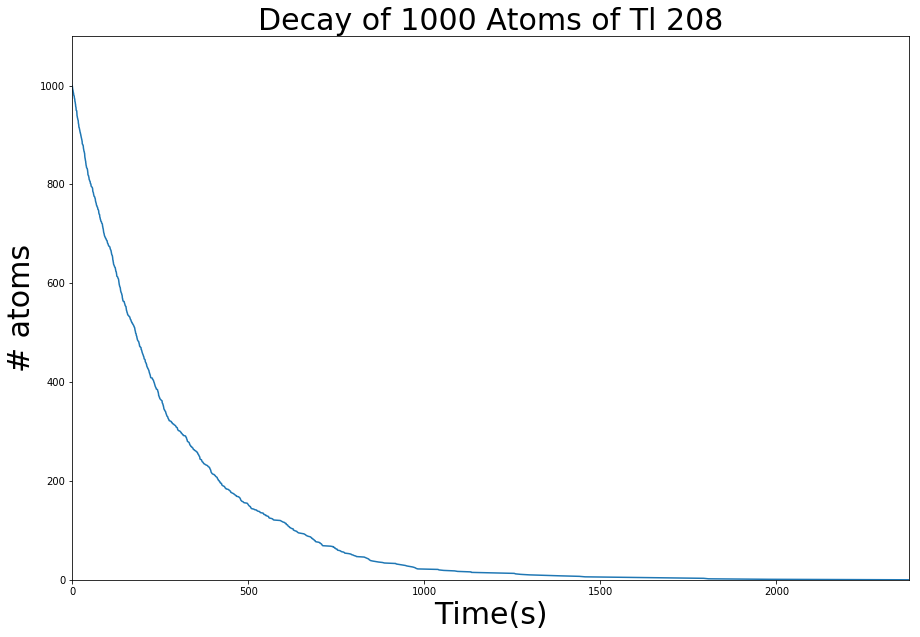

In [22]:
from random import random 
import numpy as np
import matplotlib.pyplot as plt

# Set the constants
# Number of thallium and lead atoms
NTl = 1000

# Half life of thallium in seconds
tau = 3.053*60



# We want 1000 random points from 0 to 1 to insert
# into the expression for t to generate the times
# of decay for each of the 1000 atoms
z = np.random.uniform(size=1000)

# Using the transformation method we arrive at the 
# equation: -tau*log2(1-z) which generates the times
# of decays for each of the atoms of thallium
t_decay = -tau * np.log2(1 - z)

# The times of decay are unordered, so we use np.sort
# to arrange them chronologically 
t_decay = np.sort(t_decay)


# We create an array of integers descending from 1000
# which we use to represent the number of atoms left after
# i decays.
N = np.zeros(1000)
for i in range(999, -1, -1):
    N[999 - i] = i
    
fig, ax = plt.subplots(figsize=(15.0,10.0))
plt.title("Decay of 1000 Atoms of Tl 208", fontsize=30)
plt.xlabel("Time(s)", fontsize=30)
plt.ylabel("# atoms", fontsize=30)

plt.xlim((0, t_decay[-1]))
plt.ylim((0, 1000 + 100))
plt.plot(t_decay, N)

# Exercise 3: Confined 2D random walk

Brownian motion is the motion of a particle, such as a smoke or dust particle, in a gas, as it is buffeted by random collisions with gas molecules.  Make a simple computer simulation of such a particle in two dimensions as follows.  The particle is confined to a square grid or lattice $L\times L$ squares on a side, so that its position can be
represented by two integers $i,j = 0\ldots L-1$.  It starts in the middle of the grid.  In each step of the simulation, choose a random direction---up, down, left, or right---and move the particle one step in that direction.  This process is called a random walk.  The particle is not allowed to move outside the limits of the lattice---if it tries to do so, choose a new random direction to move in. (We choose an odd length for the side of the square so that
there is one lattice site exactly in the center.) 

Write a program to perform a million steps of this process on a lattice with $L=101$. Make an animation of the position of the particle -- choose a suitable number of frames. 

NOTE: You can use your earlier 2D random walk code, modifying it to sample finite 2D grid of points. You'll need this for the next exercise.


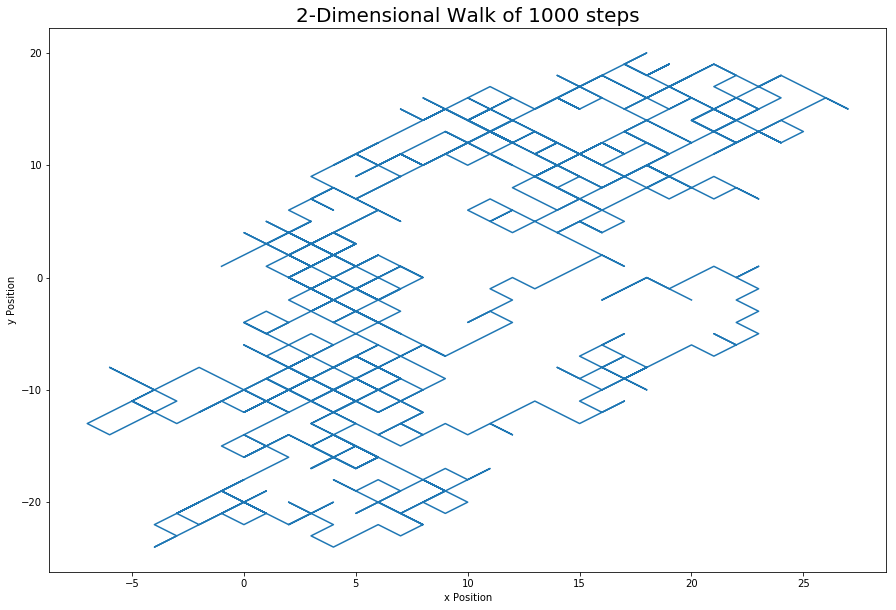

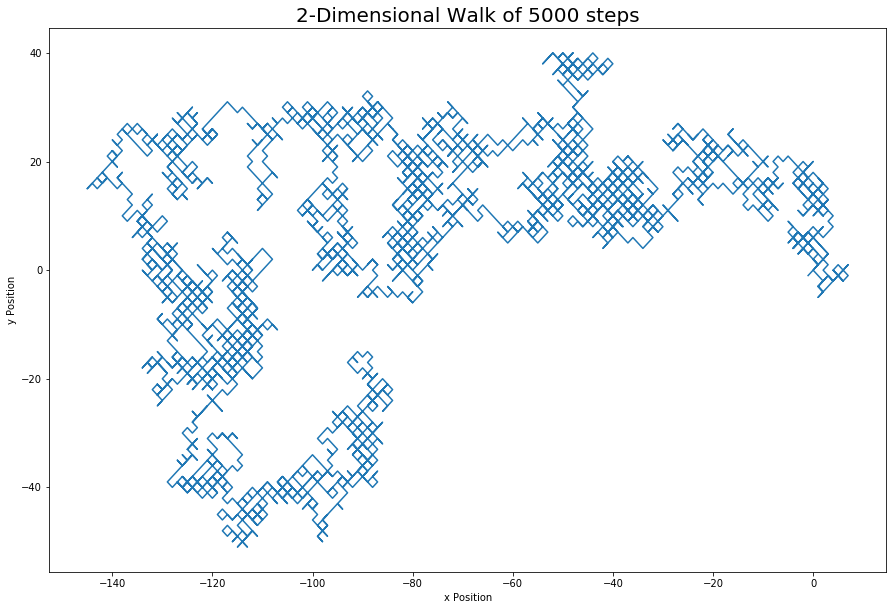

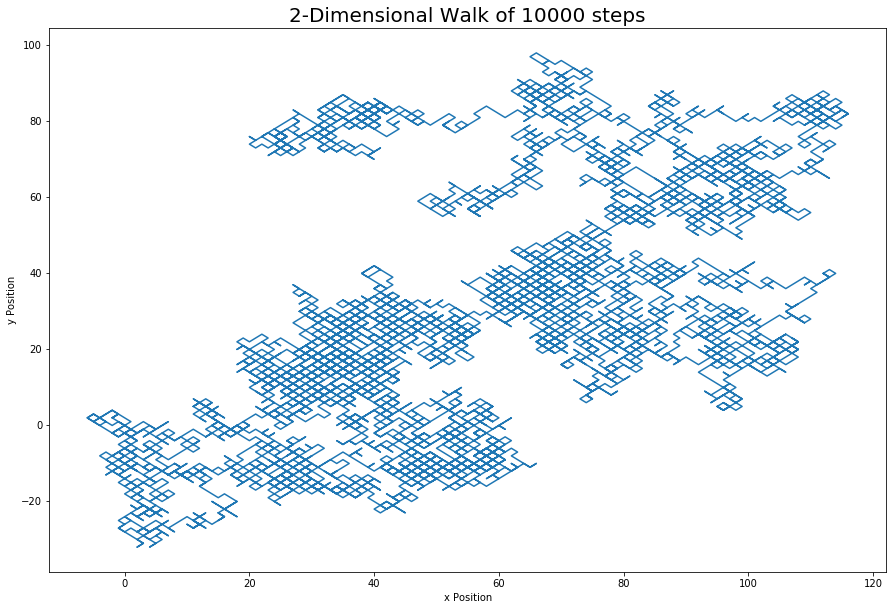

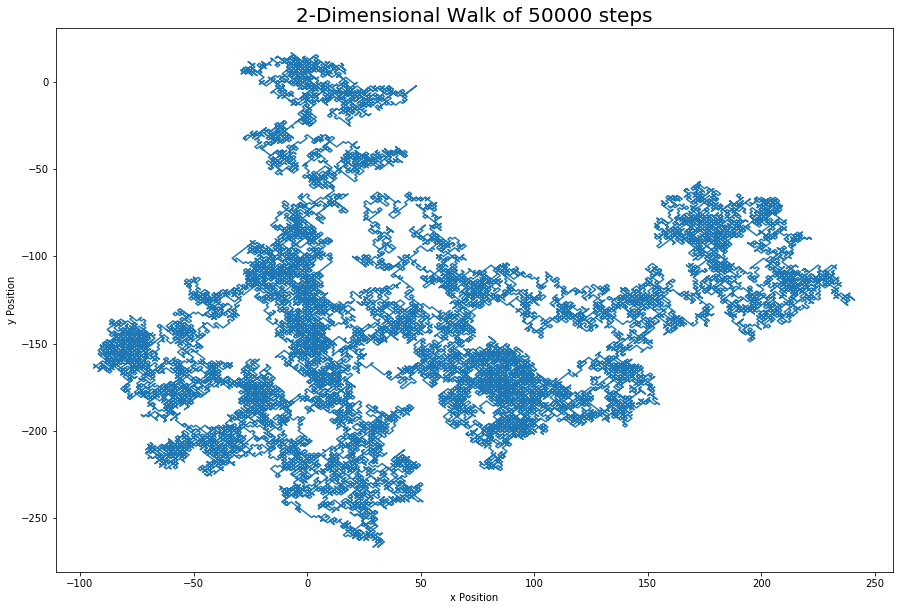

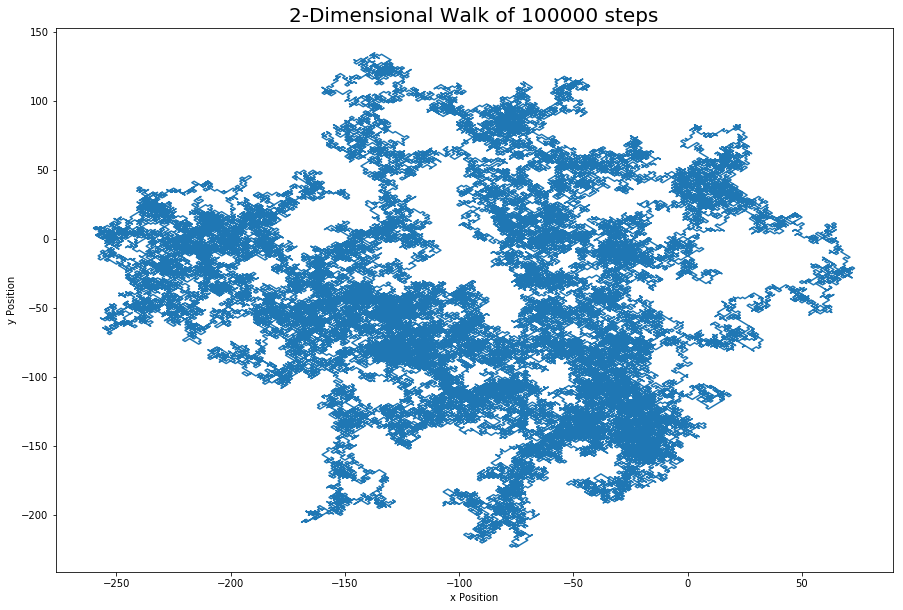

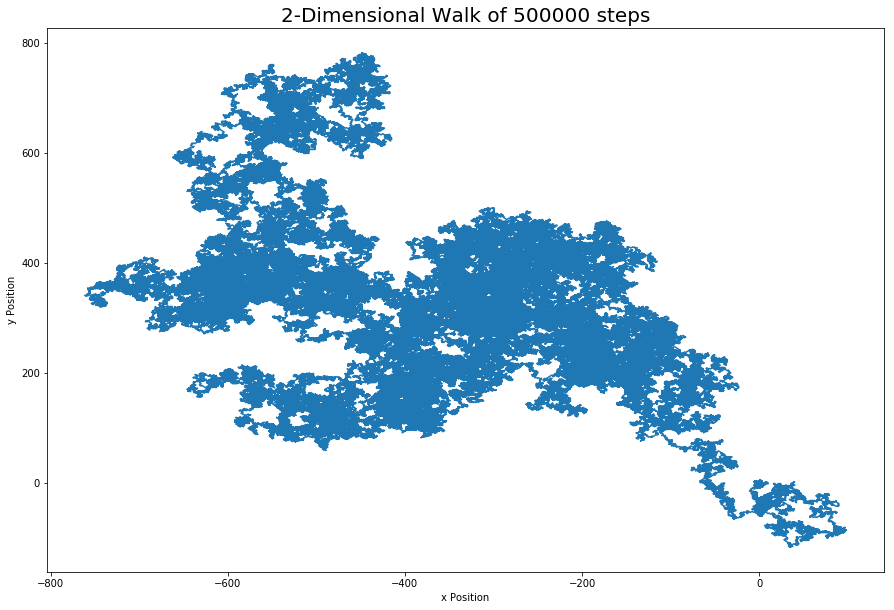

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

def choose_direction(x, y):
    '''
    input: np.array, np.array
    output:
    
    Generates an outcome for single step in a 2D random walk
    '''
    
    # We choose randomly the direction with np.random
    # by assigning a value to each of the 4 directions:
    # 1 - Up
    # 2 - Down
    # 3 - Left
    # 4 - Right
    # 
    # All with equal probability.
    direction = np.random.choice([1, 2, 3 ,4], p=(0.25,0.25, 0.25, 0.25))
    
    if direction == 1:
        x[i] = x[i-1]+1
        y[i] = 0
    elif direction == 2:
        steps[i] = (-1, 0)
    elif direction == 3:
        steps[i] = (0, -1)
    else:
        steps[i] = (0, 1)
    
def generate_walk(N):
    '''
    
    '''
    x = np.zeros(N)
    y = np.zeros(N)
    
    # Generating the N steps
    for i in range(N):
            
        
        
        # If the direction is up then steps[i] = (1, 0)
        if direction == 1:
            x[i] = x[i-1]+1
            y[i] = 0
        elif direction == 2:
            steps[i] = (-1, 0)
        elif direction == 3:
            steps[i] = (0, -1)
        else:
            steps[i] = (0, 1)
            
        
    return np.cumsum(steps)



steps=[1000,5000,10000,50000,100000,500000]
for step in steps:
    
    x_walk = generate_walk(step)
    y_walk = generate_walk(step)
    
    fig, ax = plt.subplots(figsize=(15.0,10.0))
    plt.title("2-Dimensional Walk of {0} steps".format(step), fontsize=20.0)
    plt.ylabel('y Position')
    plt.xlabel('x Position')
    plt.plot(x_walk, y_walk)
    plt.savefig("random-walk-{0}steps.png".format(str(step)))



# Exercise 4: Simulating diffusion-limited aggregation

In the next exercise, we will use random numbers to simulate a more complex physical process: diffusion limited aggregation.

In this exercise you will develop a computer program to reproduce one of the most famous models in computational physics, diffusion-limited aggregation, or DLA for short.  There are various versions of DLA, but
the one we'll study is as follows.  You take a square grid with a single particle in the middle.  The particle performs a random walk from square to square on the grid until it reaches a point on the edge of the system, at
which point it "sticks" to the edge, becoming anchored there and immovable:

![image.](dla.png)

Then a second particle starts at the center and does a random walk until it sticks either to an edge or to the other particle.  Then a third particle starts, and so on.  Each particle starts at the center and walks until it
sticks either to an edge or to any anchored particle.

* Exercise 3 will serve as a starting point for your DLA program. Modify your program to perform the DLA process on a $101\times101$ lattice---we choose an odd length for the side of the square so that there is one lattice site exactly in the center.  Repeatedly introduce a new particle at the center and have it walk randomly until it sticks to an edge or an anchored particle.

* You will need to decide some things.  How are you going to store the
  positions of the anchored particles?  On each step of the random walk you
  will have to check the particle's neighboring squares to see if they are
  outside the edge of the system or are occupied by an anchored particle.
  How are you going to do this?  You should also modify your visualization
  code from the Brownian motion exercise to visualize the positions of both
  the randomly walking particles and the anchored particles.  Run your
  program for a while and observe what it does.

* In the interests of speed, change your program so that it shows only
  the anchored particles on the screen and not the randomly walking ones.
  That way you need update the pictures on the screen only when a new
  particle becomes anchored. 

* Set up the program so that it stops running once there is an anchored
  particle in the center of the grid, at the point where each particle
  starts its random walk.  Once there is a particle at this point, there's
  no point running any longer because any further particles added will be
  anchored the moment they start out.

* Run your program and see what it produces.  If you are feeling patient,
  try modifying it to use a $201\times201$ lattice and run it again---the
  pictures will be more impressive, but you'll have to wait longer to
  generate them.

* A nice further twist is to modify the program so that the anchored
  particles are shown in different shades or colors depending on their age,
  with the shades or colors changing gradually from the first particle
  added to the last.
